In [1]:
import torch

In [2]:
# Trackable variable
x = torch.tensor(2.0,requires_grad=True)

In [3]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1

In [4]:
print(y)  # grad_fn: gradient function

tensor(63., grad_fn=<AddBackward0>)


In [5]:
type(y)

torch.Tensor

In [6]:
# Back propagation
y.backward()

In [7]:
x.grad   

# 93 is the result of y's gradient respect of x
# a.k.a the slope of the polynomial at the point (2, 63)

tensor(93.)

In [8]:
x = torch.tensor([[1.,2.,3.],[3.,2.,1.]], requires_grad=True)

In [9]:
print(x)

tensor([[1., 2., 3.],
        [3., 2., 1.]], requires_grad=True)


In [10]:
y = 3*x + 2

In [11]:
print(y)

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)


In [12]:
z = 2*y**2

In [13]:
print(z)

tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)


In [14]:
out = z.mean()

In [15]:
print(out)

tensor(140., grad_fn=<MeanBackward0>)


In [16]:
out.backward()

In [17]:
print(x.grad)    # partial derivaties of 'out' with respect of x

tensor([[10., 16., 22.],
        [22., 16., 10.]])


In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Torch Neural Networks
import torch.nn as nn

In [20]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [21]:
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [22]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)

In [23]:
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [24]:
y = 2*X + 1 + e

In [25]:
y.shape

torch.Size([50, 1])

In [26]:
# Cannot plot a pytorch tensor, have to convert to numbers
X.numpy()

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.],
       [29.],
       [30.],
       [31.],
       [32.],
       [33.],
       [34.],
       [35.],
       [36.],
       [37.],
       [38.],
       [39.],
       [40.],
       [41.],
       [42.],
       [43.],
       [44.],
       [45.],
       [46.],
       [47.],
       [48.],
       [49.],
       [50.]], dtype=float32)

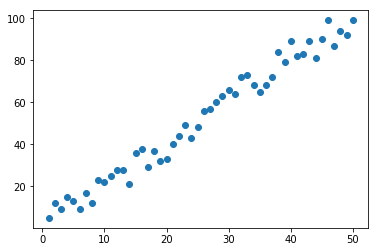

In [27]:
plt.scatter(X.numpy(),y.numpy())

In [28]:
# Random weight and random bias
torch.manual_seed(59)

model = nn.Linear(in_features=1,out_features=1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [29]:
# Set up model class
class Model(nn.Module):
    
    # Initiation method
    def __init__(self,in_features,out_features):
        
        super().__init__()
        self.linear = nn.Linear(in_features,out_features)   # Neural network layer's type is linear layer
        
    # Forward method
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

In [30]:
torch.manual_seed(59)

model = Model(1,1)

print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [31]:
for name,param in model.named_parameters():
    print(name,'\t',param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [32]:
# weight * x + bias
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [33]:
x1 = np.linspace(0.0,50.0,50)

In [34]:
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [35]:
w1 = 0.1059
b1 = 0.9637

y1 = w1*x1 + b1

In [36]:
y1

array([0.9637    , 1.07176122, 1.17982245, 1.28788367, 1.3959449 ,
       1.50400612, 1.61206735, 1.72012857, 1.8281898 , 1.93625102,
       2.04431224, 2.15237347, 2.26043469, 2.36849592, 2.47655714,
       2.58461837, 2.69267959, 2.80074082, 2.90880204, 3.01686327,
       3.12492449, 3.23298571, 3.34104694, 3.44910816, 3.55716939,
       3.66523061, 3.77329184, 3.88135306, 3.98941429, 4.09747551,
       4.20553673, 4.31359796, 4.42165918, 4.52972041, 4.63778163,
       4.74584286, 4.85390408, 4.96196531, 5.07002653, 5.17808776,
       5.28614898, 5.3942102 , 5.50227143, 5.61033265, 5.71839388,
       5.8264551 , 5.93451633, 6.04257755, 6.15063878, 6.2587    ])

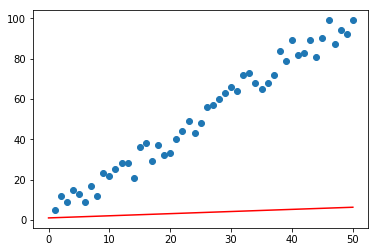

In [37]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x1,y1,'r')

In [38]:
criterion = nn.MSELoss()

In [39]:
# SGD = stochastic gradient descent, lr = learning rate
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

In [40]:
# Epoch: a single pass through the entire data set.
# Need sufficient number of epochs to reach a plateau close to our own parameters

epochs = 50
losses = []

for i in range(epochs):
    
    i = i + 1
    
    # Predicting on the forward pass
    y_pred = model.forward(X)
    
    # Calculate our loss (error)
    loss = criterion(y_pred,y)
    
    # Record that error
    losses.append(loss)
    
    print(f"epoch {i} loss: {loss.item()} weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}")
    
    # Reset gradient for each new epoch
    optimizer.zero_grad()
    
    # Back propagation
    loss.backward()
    
    # Update hyperparameter
    optimizer.step()

epoch 1 loss: 3057.216796875 weight: 0.10597813129425049 bias: 0.9637961387634277
epoch 2 loss: 1588.531005859375 weight: 3.334900379180908 bias: 1.0604636669158936
epoch 3 loss: 830.3001098632812 weight: 1.0148327350616455 bias: 0.9922627806663513
epoch 4 loss: 438.8524169921875 weight: 2.6817996501922607 bias: 1.0425218343734741
epoch 5 loss: 236.7615203857422 weight: 1.4840211868286133 bias: 1.0076650381088257
epoch 6 loss: 132.4291229248047 weight: 2.3446059226989746 bias: 1.0339646339416504
epoch 7 loss: 78.56572723388672 weight: 1.7262253761291504 bias: 1.0163217782974243
epoch 8 loss: 50.75775909423828 weight: 2.170504093170166 bias: 1.0302516222000122
epoch 9 loss: 36.4012336730957 weight: 1.8512457609176636 bias: 1.0214954614639282
epoch 10 loss: 28.989227294921875 weight: 2.0806007385253906 bias: 1.029038906097412
epoch 11 loss: 25.162382125854492 weight: 1.9157683849334717 bias: 1.0248701572418213
epoch 12 loss: 23.186473846435547 weight: 2.034165620803833 bias: 1.0291162729

Text(0.5, 0, 'Epoch ')

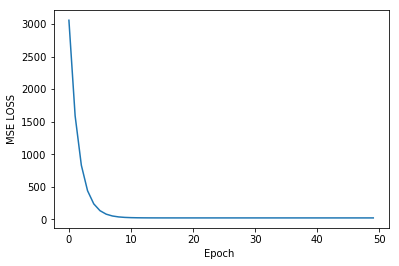

In [41]:
plt.plot(range(epochs),losses)
plt.ylabel('MSE LOSS')
plt.xlabel('Epoch ')

In [42]:
x = np.linspace(0.0,50.0,50)
current_weight = model.linear.weight.item()
current_bias = model.linear.weight.item()

predicted_y = current_weight*x + current_bias

In [43]:
predicted_y

array([  1.98381913,   4.00812436,   6.03242959,   8.05673482,
        10.08104005,  12.10534529,  14.12965052,  16.15395575,
        18.17826098,  20.20256621,  22.22687144,  24.25117668,
        26.27548191,  28.29978714,  30.32409237,  32.3483976 ,
        34.37270283,  36.39700807,  38.4213133 ,  40.44561853,
        42.46992376,  44.49422899,  46.51853422,  48.54283946,
        50.56714469,  52.59144992,  54.61575515,  56.64006038,
        58.66436562,  60.68867085,  62.71297608,  64.73728131,
        66.76158654,  68.78589177,  70.81019701,  72.83450224,
        74.85880747,  76.8831127 ,  78.90741793,  80.93172316,
        82.9560284 ,  84.98033363,  87.00463886,  89.02894409,
        91.05324932,  93.07755455,  95.10185979,  97.12616502,
        99.15047025, 101.17477548])

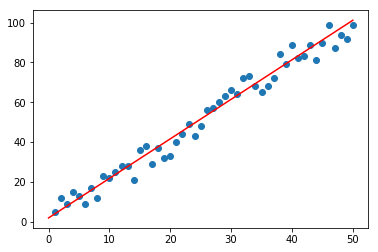

In [44]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x,predicted_y,'r')

In [45]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df = pd.read_csv("/Users/maximillian/Desktop/求职/Machine Learning/PyTorch/PYTORCH_NOTEBOOKS/Data/iris.csv")

In [47]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [48]:
df.shape

(150, 5)

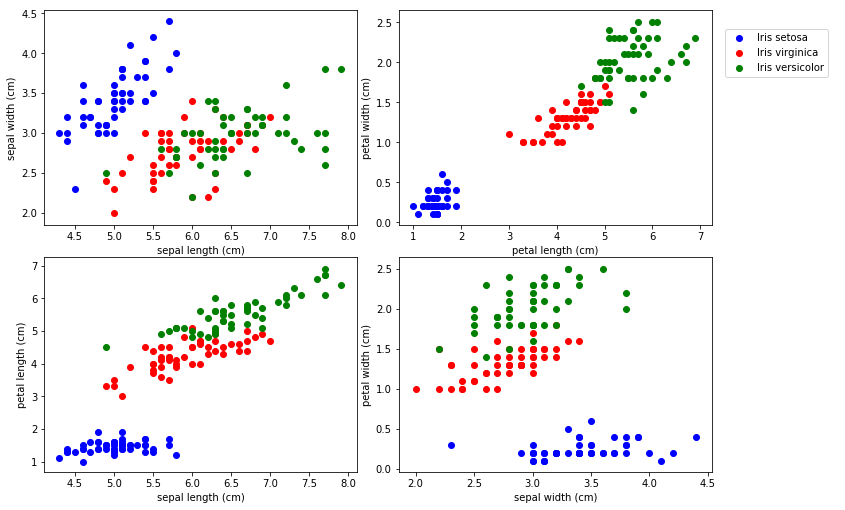

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

# Method 1: Regular Process

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
features = df.drop('target',axis=1).values
label = df['target'].values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=33)

# random_state functions as a seed, make sure train-test splits are always deterministic

In [53]:
X_train

array([[5.6, 2.7, 4.2, 1.3],
       [6.7, 3.1, 4.7, 1.5],
       [5.6, 2.8, 4.9, 2. ],
       [6.4, 3.2, 5.3, 2.3],
       [6.7, 3.1, 5.6, 2.4],
       [6.7, 3. , 5.2, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5. , 2.3, 3.3, 1. ],
       [4.9, 3.1, 1.5, 0.1],
       [6.3, 2.3, 4.4, 1.3],
       [5.8, 2.6, 4. , 1.2],
       [6.2, 2.9, 4.3, 1.3],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.1, 2.5, 3. , 1.1],
       [4.8, 3.4, 1.6, 0.2],
       [7.9, 3.8, 6.4, 2. ],
       [5.1, 3.4, 1.5, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.5, 3. , 5.5, 1.8],
       [5.4, 3.9, 1.7, 0.4],
       [7. , 3.2, 4.7, 1.4],
       [5.8, 2.8, 5.1, 2.4],
       [7.7, 2.6, 6.9, 2.3],
       [5.5, 2.5, 4. , 1.3],
       [5.9, 3.2, 4.8, 1.8],
       [4.9, 3.1, 1.5, 0.1],
       [4.5, 2.3, 1.3, 0.3],
       [6.3, 2.8, 5.1, 1.5],
       [4.4, 2.9, 1.4, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [7.2, 3. , 5.8, 1.6],
       [6. , 3

In [54]:
# Convert arrays into tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [55]:
# Target here only has three classes, so it doesn't have to be float
y_train = torch.LongTensor(y_train).reshape(-1,1)
y_test = torch.LongTensor(y_test).reshape(-1,1)

# Method 2: Using Pytorch's Built-in Utilities

In [56]:
from torch.utils.data import TensorDataset, DataLoader

In [57]:
data = df.drop('target',axis=1).values
labels = df['target'].values

In [58]:
iris = TensorDataset(torch.FloatTensor(data),torch.LongTensor(labels))

In [59]:
type(iris)   #TensorDataset object

torch.utils.data.dataset.TensorDataset

In [60]:
len(iris)

150

In [61]:
for i in iris:
    print(i)

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))
(tensor([5.4000, 3.9000, 1.7000, 0.4000]), tensor(0))
(tensor([4.6000, 3.4000, 1.4000, 0.3000]), tensor(0))
(tensor([5.0000, 3.4000, 1.5000, 0.2000]), tensor(0))
(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.4000, 3.7000, 1.5000, 0.2000]), tensor(0))
(tensor([4.8000, 3.4000, 1.6000, 0.2000]), tensor(0))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([4.3000, 3.0000, 1.1000, 0.1000]), tensor(0))
(tensor([5.8000, 4.0000, 1.2000, 0.2000]), tensor(0))
(tensor([5.7000, 4.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.4000, 3.9000, 1.3000, 0.4000]), tensor(0))
(tensor([5.1000, 3.5000, 1.4000, 0.3000]), tensor(0))
(tensor([5.7000, 3.8000, 1.7

In [62]:
# Ask each batch size to be 50
iris_loader = DataLoader(iris,batch_size=50,shuffle=True)

In [63]:
# We have 150/50 = 3 batches
for i_batch,sample_batch in enumerate(iris_loader):
    print(i_batch,sample_batch)

0 [tensor([[5.5000, 4.2000, 1.4000, 0.2000],
        [6.3000, 2.5000, 4.9000, 1.5000],
        [5.7000, 3.0000, 4.2000, 1.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [7.3000, 2.9000, 6.3000, 1.8000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [5.7000, 2.6000, 3.5000, 1.0000],
        [7.7000, 2.6000, 6.9000, 2.3000],
        [4.6000, 3.2000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [5.2000, 2.7000, 3.9000, 1.4000],
        [6.5000, 3.0000, 5.5000, 1.8000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [7.2000, 3.0000, 5.8000, 1.6000],
        [5.8000, 2.7000, 4.1000, 1.0000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [5.6000, 2.5000, 3.9000